<a href="https://colab.research.google.com/github/ThePingPing/Torch_Model/blob/main/BasicLinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import torch
import torch.nn as nn

from torchsummary import summary
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader, TensorDataset

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import time
from pathlib import Path


import matplotlib.pyplot as plt

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [28]:
## Constante for the model

numbers_epochs = 200  ## for the futur model loop
name = "Linear Regretion"


In [29]:
def create_data():

  """ Let's create a *known parameters a basic linear regration with formula { y = aX + b } """


  ## initialization parametres

  weight = 0.7
  bias = 0.3

  start = 0
  end = 1

  step = 0.02

  X = torch.arange(start, end, step).unsqueeze(dim = 1)
  y = weight * X + bias

  print(f"The data into the Tensor is: {X[:]}")
  print(f" the y vector is : {y} , and the shape is: {y.shape}")
  return X, y


In [ ]:
X, y = create_data()

In [31]:
def data_loader_convert(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

  train_data = TensorDataset(X_train, y_train)
  test_data = TensorDataset(X_test, y_test)

  batchsize = 8

  train_loader_reg = DataLoader(train_data, batch_size=train_data.tensors[0].shape[0], shuffle=True, drop_last=True)
  test_loader_reg = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

  print("Train loader EMNIST : ",  train_loader_reg.dataset.tensors[0].shape)
  print("Test loader EMNIST : ", test_loader_reg.dataset.tensors[1].shape)

  return  train_loader_reg, test_loader_reg, X_train, X_test, y_train, y_test

In [32]:
train_loader_reg, test_loader_reg, X_train, X_test, y_train, y_test = data_loader_convert(X, y)

Train loader EMNIST :  torch.Size([40, 1])
Test loader EMNIST :  torch.Size([10, 1])


In [33]:
def plot_prediction(trian_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):

  """ Plot the data and compares with the prediction """

  plt.figure(figsize=(10, 7))

  ## plot the training data set
  plt.scatter(trian_data, train_labels, c="b", s=4, label = "Training Data")

  ## plot the testing data set
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

  if predictions is not None:
    ## if existe plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

  plt.legend()
  plt.show()



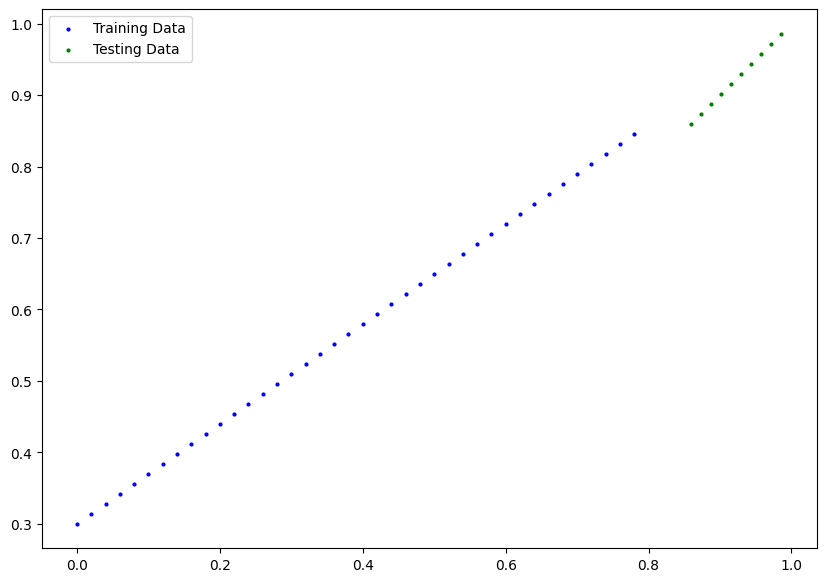

In [34]:
plot_prediction(trian_data = X_train, train_labels = y_train, test_data = y_test, test_labels = y_test, predictions = None)

In [35]:
class LinearRegModel(nn.Module):

  def __init__(self, printtoggle):
    super().__init__()

    """ for the Toggle """
    self.print = printtoggle

    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x):

    if self.print: print(f'Input:{list(x.shape)}')
    ## Now remembers the output function is a linear regretion formula y = wights * X + bias

    return  self.weights * x + self.bias




In [36]:
def initialize_model():

  ModelLinReg = LinearRegModel(False)
  loss_function = nn.L1Loss() ## Linear Regretion Task --> the mean absoluts error loss
  learning_rate = (10 ** -3)
  weight_dec = (10 ** -5)
  momentum = 0.95

  optimizer = SGD(ModelLinReg.parameters(), lr=learning_rate, momentum = momentum, weight_decay= weight_dec)

  return ModelLinReg, loss_function, optimizer

In [37]:
ModelLinReg, loss_function, optimizer = initialize_model()

In [38]:
def try_prediciton(ModelLinReg, loss_function, test_loader):

   X, y = next(iter(test_loader))
   with torch.inference_mode(): ## turn off the gardient tracking
    yHat = ModelLinReg(X)
    loss = loss_function(yHat, y)
    print(f"the X_test_value is {X}, The true y is {y} , the prediction is {yHat}")
    plot_prediction(predictions = yHat)



the X_test_value is tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]), The true y is tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]]) , the prediction is tensor([[-2.2479],
        [-2.2427],
        [-2.2375],
        [-2.2323],
        [-2.2271],
        [-2.2219],
        [-2.2166],
        [-2.2114],
        [-2.2062],
        [-2.2010]])


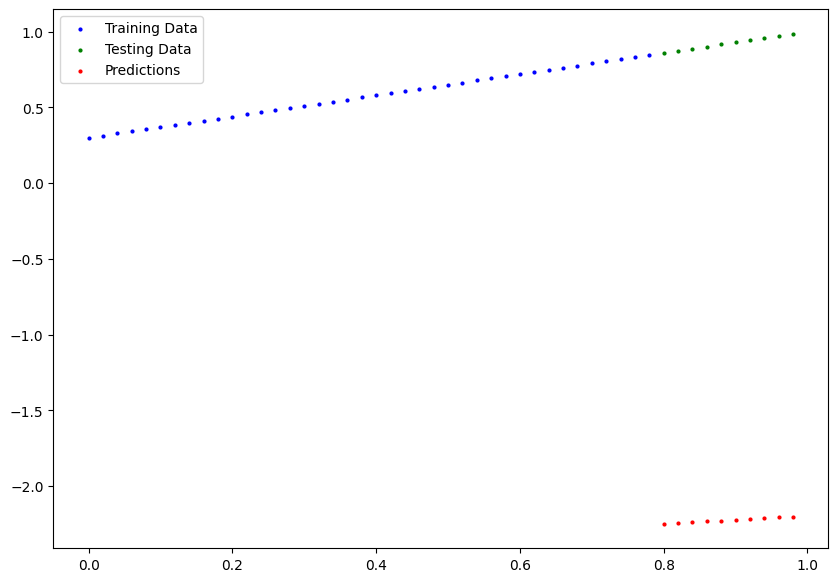

In [39]:
try_prediciton(ModelLinReg, loss_function, test_loader_reg)

In [40]:
def test_model(ModelLinReg, loss_function, train_loader):

  dict_model_parametres = list(ModelLinReg.state_dict())
  print(f"The intialize model parameters is: {dict_model_parametres}")

  X, y = next(iter(train_loader))
  yHat = ModelLinReg(X)
  loss = loss_function(yHat, y)

  print(y)
  print(yHat.shape)

  print(" ")
  print("yHat Shape", yHat.shape)
  print(" Thes loss ", loss)
  # print(summary(ModelLinReg.to(device),(8, 1)))

In [41]:
test_model(ModelLinReg, loss_function, train_loader_reg)

The intialize model parameters is: ['weights', 'bias']
tensor([[0.4540],
        [0.6360],
        [0.3840],
        [0.3560],
        [0.6220],
        [0.3000],
        [0.5380],
        [0.5520],
        [0.5800],
        [0.3140],
        [0.6500],
        [0.8180],
        [0.8040],
        [0.7620],
        [0.6920],
        [0.4820],
        [0.3280],
        [0.4400],
        [0.7900],
        [0.4260],
        [0.7480],
        [0.5660],
        [0.4120],
        [0.3420],
        [0.7340],
        [0.7760],
        [0.3980],
        [0.6780],
        [0.6640],
        [0.5100],
        [0.5240],
        [0.6080],
        [0.3700],
        [0.4680],
        [0.7200],
        [0.5940],
        [0.4960],
        [0.8460],
        [0.7060],
        [0.8320]])
torch.Size([40, 1])
 
yHat Shape torch.Size([40, 1])
 Thes loss  tensor(2.9278, grad_fn=<MeanBackward0>)


In [48]:
def train_model(Model, loss_function, optimizer, train_loader, test_loader, numbers_epochs, name):

  ## Implement a new model , never see any data
  start_time = time.time()


  ## Push to GPU
  Model.to(device)

  # number of epochs

  ## initialize losses
  epoch_count = []
  train_Loss = []
  test_Loss = []

  ## loop over epochs
  for epochi in range(numbers_epochs):

    # loop over training data batches
    Model.train() ## set all parametres require_grad

    for X, y in train_loader:

      # push data to the GPU

      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      yHat = Model(X)
      loss = loss_function(yHat, y)
      print(f" Loss : {loss}")

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    # end of batch loop...

    # test accuracy
    Model.eval() ## turn off the gradient tracking (dropout / batchNormalization)
    X_test, y_test = next(iter(test_loader))  # extract X,y from test dataloader the model never seen before

    # push data to the GPU
    X_test = X_test.to(device)
    y_test = y_test.to(device)

    with torch.inference_mode():  # turn of the Gradiente tracking , and more things
        yHat_test = Model(X_test)
        loss_test = loss_function(yHat_test, y_test)

    if epochi % 10 == 0:

      epoch_count.append(epochi)
      train_Loss.append(loss.item())
      test_Loss.append(loss_test.item())

      print(f"Epoch: {epochi} | Loss : {loss} | Test loss : {loss_test}")
      print(Model.state_dict())

    # test_Loss[epochi] = loss.item()
    # test_error[epochi] = 100 * torch.mean((torch.argmax(yHat, axis=1) != y).float()).item()

  # end epochs
  ModelTrained = Model
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("The time computing for the Model training / retrainig is --> ", elapsed_time, " for the Model : ", name)

  # function output
  return ModelTrained, epoch_count, train_Loss, test_Loss

In [49]:
ModelTrained, epoch_count, train_Loss, test_Loss = train_model(ModelLinReg, loss_function, optimizer, train_loader_reg, test_loader_reg, numbers_epochs, name)

 Loss : 0.09051436185836792
Epoch: 0 | Loss : 0.09051436185836792 | Test loss : 0.15651097893714905
OrderedDict([('weights', tensor([1.1144])), ('bias', tensor([0.0877]))])
 Loss : 0.09062626957893372
 Loss : 0.09063833951950073
 Loss : 0.0906563475728035
 Loss : 0.09056754410266876
 Loss : 0.090359166264534
 Loss : 0.09003716707229614
 Loss : 0.08960725367069244
 Loss : 0.08907482028007507
 Loss : 0.08844499289989471
 Loss : 0.08772263675928116
Epoch: 10 | Loss : 0.08772263675928116 | Test loss : 0.1347944736480713
OrderedDict([('weights', tensor([1.0826])), ('bias', tensor([0.0943]))])
 Loss : 0.0869123786687851
 Loss : 0.08601859211921692
 Loss : 0.08504549413919449
 Loss : 0.08399703353643417
 Loss : 0.08287695795297623
 Loss : 0.08171779662370682
 Loss : 0.08058889210224152
 Loss : 0.07942219823598862
 Loss : 0.07822982966899872
 Loss : 0.07713544368743896
Epoch: 20 | Loss : 0.07713544368743896 | Test loss : 0.1458081752061844
OrderedDict([('weights', tensor([1.0599])), ('bias', t

In [50]:
def retray_prediction(ModelTrained, test_loader):

  X, y = next(iter(test_loader))
  with torch.inference_mode(): ## turn off the gardient tracking
    yHat = ModelTrained(X)
    plot_prediction(predictions = yHat)
  print(ModelTrained.state_dict())


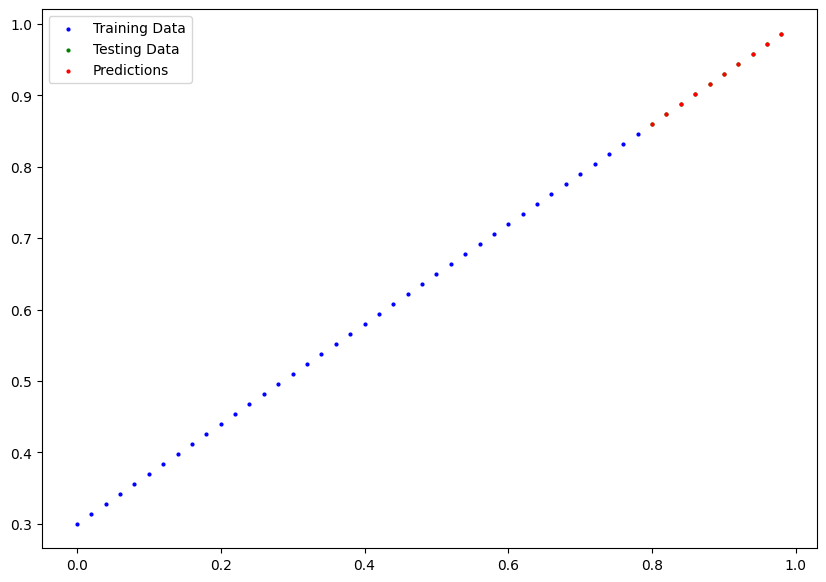

OrderedDict([('weights', tensor([0.7020])), ('bias', tensor([0.2983]))])


In [51]:
retray_prediction(ModelTrained, test_loader_reg)

In [52]:
def plot_results(epoch_count, train_Loss, test_Loss):

  plt.figure(figsize=(10, 7))
  plt.plot(epoch_count, train_Loss, label = "Train Loss" )
  plt.plot(epoch_count, test_Loss, label = "Test Loss" )

  plt.title("Training & Testing Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.show()

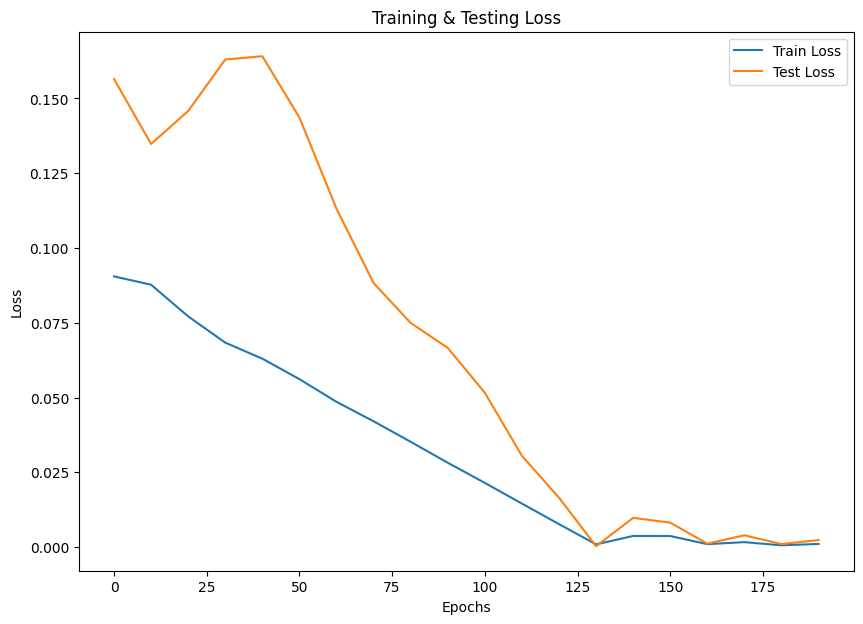

In [53]:
plot_results(epoch_count, train_Loss, test_Loss)

In [61]:
def save_model(ModelTrained):

  ## saving your model --> with torch.save(), torch.load()

  print(f" check the state dict {ModelTrained.state_dict()}")
  """ OrderedDict([('weights', tensor([0.7020])), ('bias', tensor([0.2983]))]) so close to the true value """

  ## first create a model directory in google drive

  MODEL_PATH = Path("model")
  MODEL_PATH.mkdir(parents = True, exist_ok = True)
  MODEL_NAME = "basic_lin_reg.pth" ## .pth --> pytorch Object
  MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

  print(f"The model path is: {MODEL_SAVE_PATH}")

  ## now save it
  torch.save(obj=ModelTrained.state_dict(), f=MODEL_SAVE_PATH)


In [ ]:
save_model(ModelTrained)

In [63]:
def load_model():

  ## first initialize a new model
  load_model = LinearRegModel(False)

  ## Now load the sate from the saved files
  load_model.load_state_dict(torch.load(f ="/content/model/basic_lin_reg.pth"))

  ## and check the state to be sure that's correctly load
  print(f" the State from the load model is {load_model.state_dict()}")



In [64]:
load_model()

 the State from the load model is OrderedDict([('weights', tensor([0.7020])), ('bias', tensor([0.2983]))])
